In [1]:
import pandas as pd

In [3]:
df_orders = pd.read_csv("/content/data_orders.csv")
df_offers = pd.read_csv("/content/data_offers.csv")

In [4]:
df_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [5]:
df_offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [6]:
print(df_orders.info(), df_orders.shape)
print("="*80)
print(df_offers.info(), df_offers.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB
None (10716, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334363 entries, 0 to 334362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   order_gk  334363 non-

Null values present in
1. m_order_ea
2. cancellations_time_in_seconds

order_datetime should be made datetime type for easy



In [7]:
df_orders.order_datetime = pd.to_datetime(df_orders.order_datetime)
df_orders.info()

/tmp/ipython-input-80347247.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_orders.order_datetime = pd.to_datetime(df_orders.order_datetime)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_datetime                 10716 non-null  datetime64[ns]
 1   origin_longitude               10716 non-null  float64       
 2   origin_latitude                10716 non-null  float64       
 3   m_order_eta                    2814 non-null   float64       
 4   order_gk                       10716 non-null  int64         
 5   order_status_key               10716 non-null  int64         
 6   is_driver_assigned_key         10716 non-null  int64         
 7   cancellations_time_in_seconds  7307 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 669.9 KB


In [8]:
dfMain = df_orders.merge(df_offers,how='inner',on='order_gk')
dfMain.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,2025-08-21 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,2025-08-21 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,2025-08-21 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,2025-08-21 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,2025-08-21 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275


In [9]:
import numpy as np

dfMain["is_driver_assigned"] = np.where(dfMain["is_driver_assigned_key"] == 1, "Yes", "No")
dfMain["order_status"] = np.where(dfMain["order_status_key"] == 4, "Client Cancelled", "System Reject")

dfMain.drop(columns=["is_driver_assigned_key", "order_status_key"], inplace=True)

In [10]:
dfMain.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
0,2025-08-21 18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client Cancelled
1,2025-08-21 20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client Cancelled
2,2025-08-21 20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client Cancelled
3,2025-08-21 20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client Cancelled
4,2025-08-21 12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client Cancelled


In [11]:
ColumnNames = {
    'order_datetime':'order_time',
    'origin_longitude':'longitude',
    'origin_latitude':'latitude',
    'm_order_eta':'ETA',
    'order_gk':'order_id',
    'order_status_key':'order_status',
    'is_driver_assigned_key':'is_driver_assigned',
    'cancellations_time_in_seconds':'cancellation_time',
    'offer_id': 'offer_id'
}
dfMain.rename(columns=ColumnNames,inplace=True)
dfMain.head()

,order_time,longitude,latitude,ETA,order_id,cancellation_time,offer_id,is_driver_assigned,order_status
0,2025-08-21 18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client Cancelled
1,2025-08-21 20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client Cancelled
2,2025-08-21 20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client Cancelled
3,2025-08-21 20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client Cancelled
4,2025-08-21 12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client Cancelled


### **Build up distribution of orders**

In [12]:
totalCancelled = dfMain.groupby(['is_driver_assigned','order_status'])['order_id'].count()
totalCancelled

is_driver_assigned  order_status    
No                  Client Cancelled    13435
                    System Reject        9469
Yes                 Client Cancelled     8360
                    System Reject           4
Name: order_id, dtype: int64

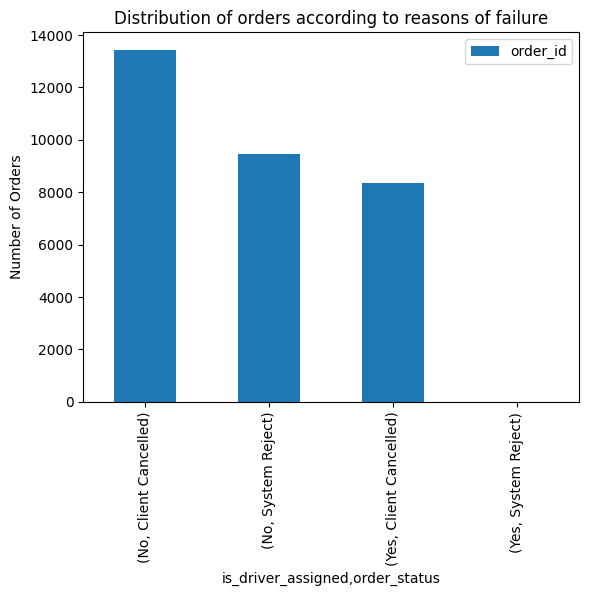

In [15]:
totalCancelled.plot(kind='bar',legend=True,subplots= False,ylabel='Number of Orders',title='Distribution of orders according to reasons of failure')

is_driver_assigned               No                            Yes  \
order_status       Client Cancelled System Reject Client Cancelled   
order_id                      13435          9469             8360   

is_driver_assigned                
order_status       System Reject  
order_id                       4  


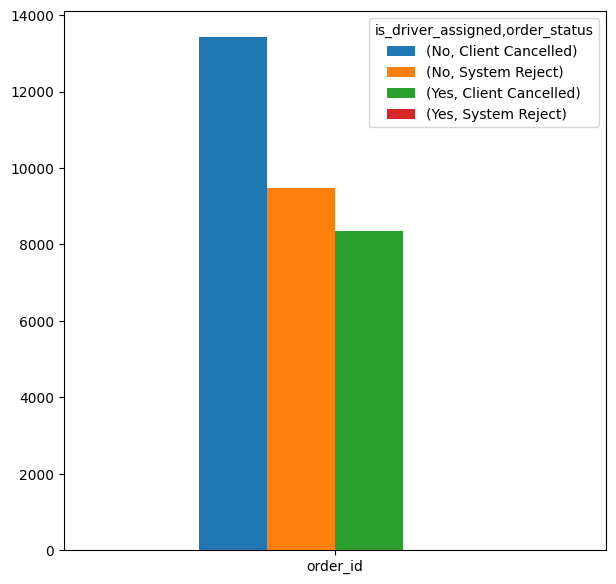

In [16]:
df_q1 = dfMain.pivot_table(columns=["is_driver_assigned", "order_status"], values="order_id", aggfunc="count")
_ = df_q1.plot(kind="bar", subplots=False, figsize=(7, 7), legend=True, rot=0)
print(df_q1)

In [18]:
dfMain['order_hour']= dfMain.order_time.dt.hour
dfMain.sample(10)

,order_time,longitude,latitude,ETA,order_id,cancellation_time,offer_id,is_driver_assigned,order_status,order_hour
12682,2025-08-21 21:45:24,-0.995389,51.450311,NaN,3000595721625,145.0,300051544441,No,Client Cancelled,21
10454,2025-08-21 22:55:27,-0.934770,51.448624,NaN,3000628807160,625.0,300052188273,No,Client Cancelled,22
3029,2025-08-21 08:22:59,-0.955580,51.453493,NaN,3000623443512,NaN,300051843245,No,System Reject,8
7404,2025-08-21 13:22:53,-0.976396,51.456537,NaN,3000589857365,87.0,300051294331,No,Client Cancelled,13
29722,2025-08-21 02:45:26,-0.985641,51.470369,NaN,3000617675752,NaN,300051731290,No,System Reject,2
25593,2025-08-21 08:31:16,-0.963254,51.449726,NaN,3000583466630,NaN,300050999542,No,System Reject,8
10036,2025-08-21 19:26:41,-0.924773,51.428314,538.0,3000588731002,119.0,300051234381,Yes,Client Cancelled,19
18827,2025-08-21 15:09:38,-0.916532,51.451992,478.0,3000594897076,71.0,300051506644,Yes,Client Cancelled,15
6896,2025-08-21 17:17:29,-0.970968,51.453389,NaN,3000578677500,75.0,300050895176,No,Client Cancelled,17
8849,2025-08-21 20:55:52,-0.946845,51.445757,NaN,3000590056723,29.0,300051308002,No,Client Cancelled,20


In [20]:
hourCategory = dfMain.groupby(by="order_hour")["order_id"].count()
hourCategory

,order_id
order_hour,
0,1993
1,1305
2,1475
3,1418
4,227
5,111
6,392
7,1566
8,3865


<Axes: xlabel='order_hour', ylabel='Number of cancelled orders'>

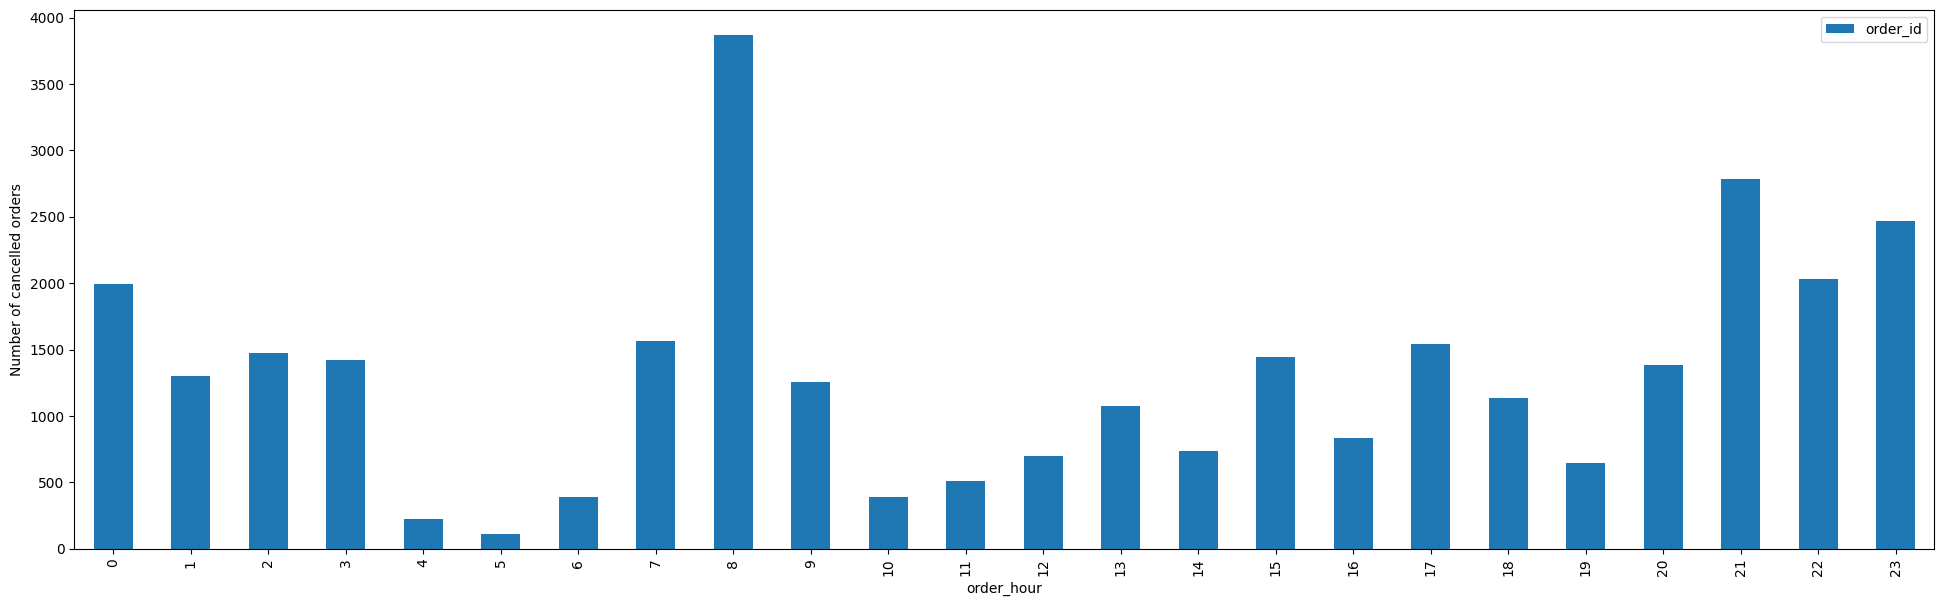

In [23]:
hourCategory.plot(kind="bar", subplots=False, figsize=(24, 7), legend=True, ylabel='Number of cancelled orders')

<Axes: xlabel='order_hour', ylabel='Number of cancelled orders'>

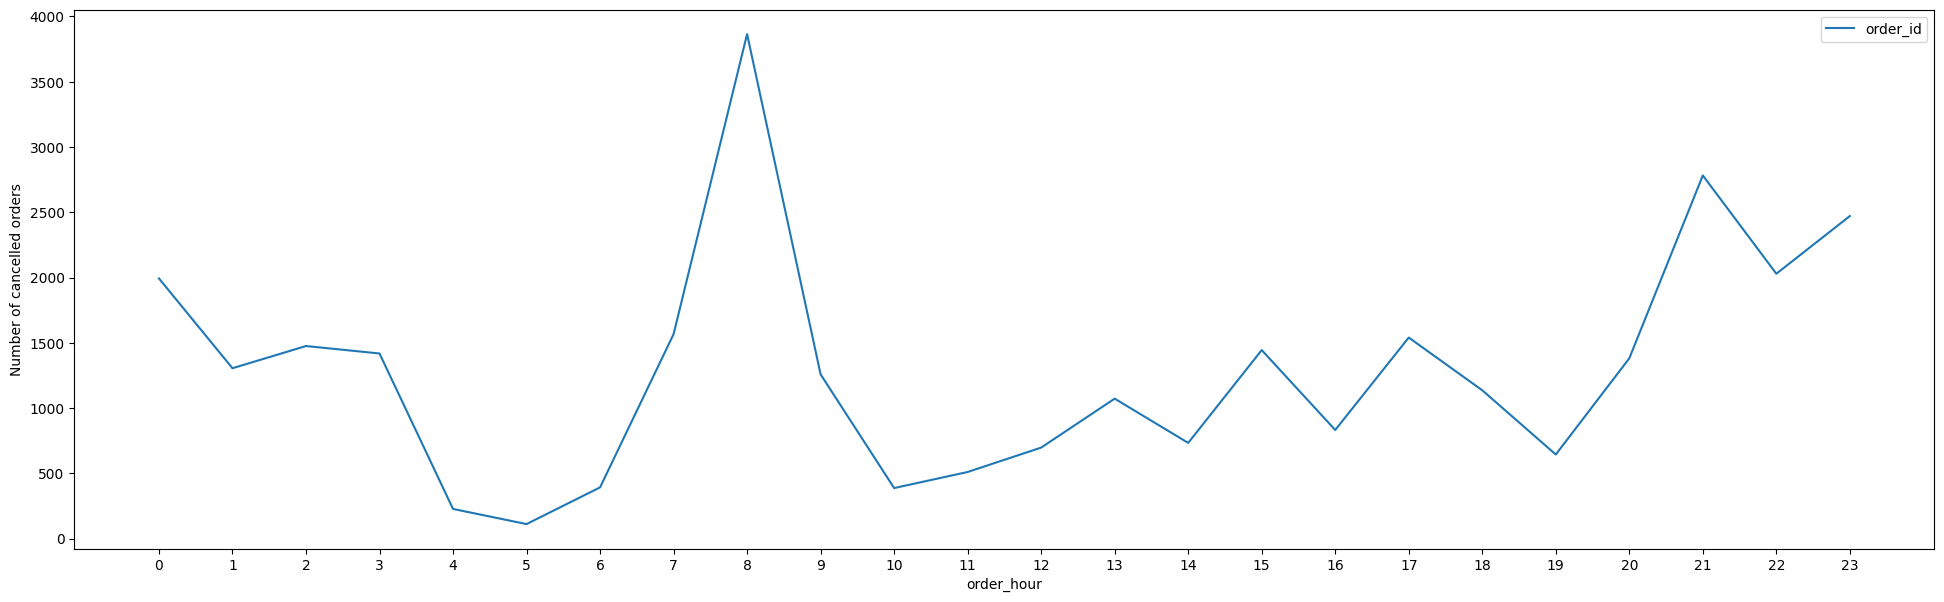

In [25]:
hourCategory.plot(figsize=(24, 7), legend=True, xticks=range(0, 24), ylabel='Number of cancelled orders')

order_hour  is_driver_assigned  order_status    
0           No                  Client Cancelled     957
                                System Reject        706
            Yes                 Client Cancelled     326
                                System Reject          4
1           No                  Client Cancelled     633
                                                    ... 
22          No                  System Reject        660
            Yes                 Client Cancelled     415
23          No                  Client Cancelled    1144
                                System Reject        883
            Yes                 Client Cancelled     444
Name: order_id, Length: 73, dtype: int64


<Axes: xlabel='order_hour'>

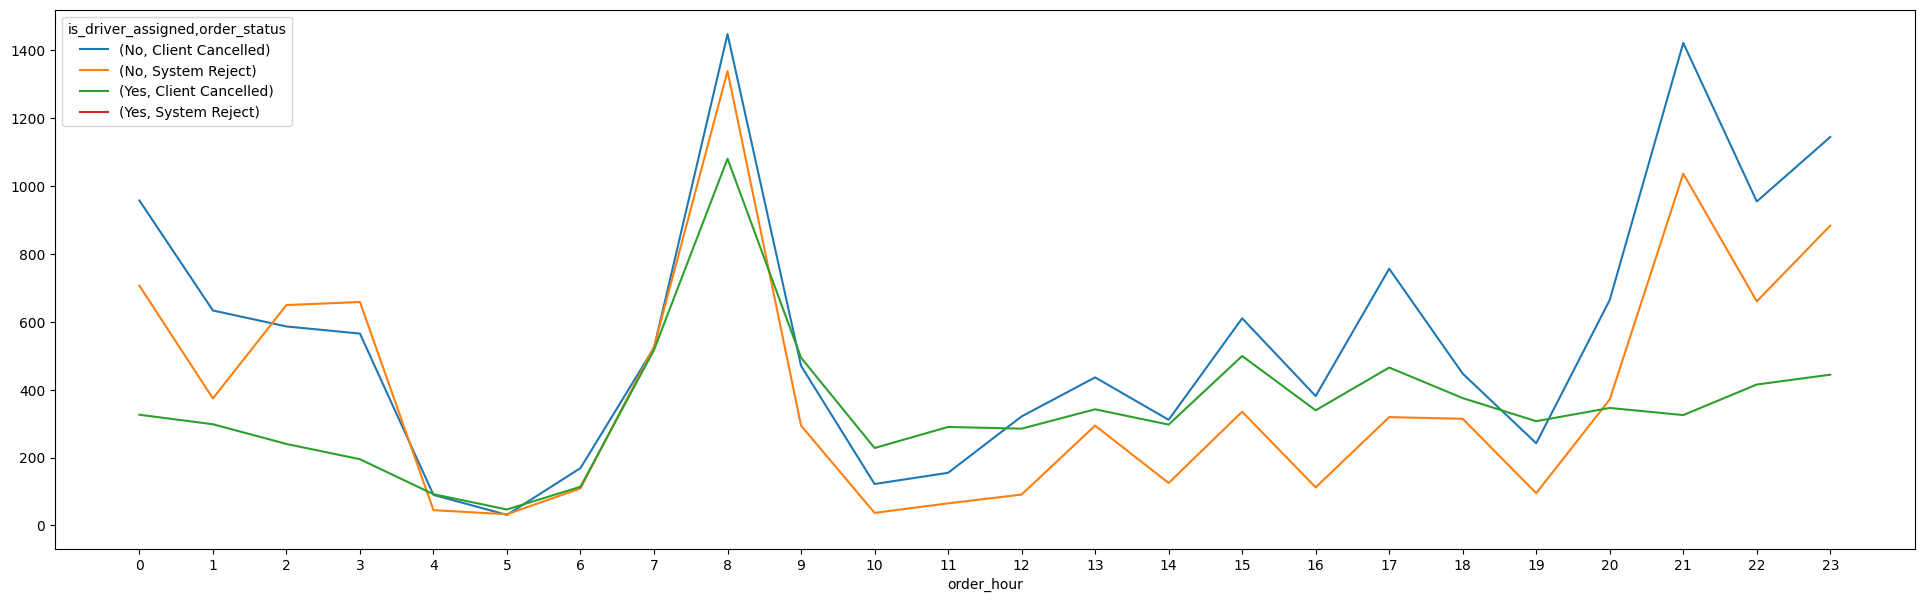

In [26]:
grouped_3cat = dfMain.groupby(by=["order_hour", "is_driver_assigned", "order_status"])["order_id"].count()
print(grouped_3cat)
grouped_3cat.reset_index().pivot(index="order_hour",
                                   columns=["is_driver_assigned", "order_status"],
                                   values="order_id").plot(xticks=range(0, 24), figsize=(24, 7))

order_hour  is_driver_assigned
0           No                    115.126437
            Yes                   276.082822
1           No                    100.593997
            Yes                   296.312081
2           No                    121.305461
            Yes                   301.466667
3           No                    129.182301
            Yes                   368.682051
4           No                    100.733333
            Yes                   245.250000
5           No                    102.838710
            Yes                   156.617021
6           No                    202.952663
            Yes                   225.508772
7           No                    141.177820
            Yes                   177.640232
8           No                    132.625432
            Yes                   172.896296
9           No                    138.014894
            Yes                   230.821862
10          No                     93.795082
            Yes         

<Axes: xlabel='order_hour'>

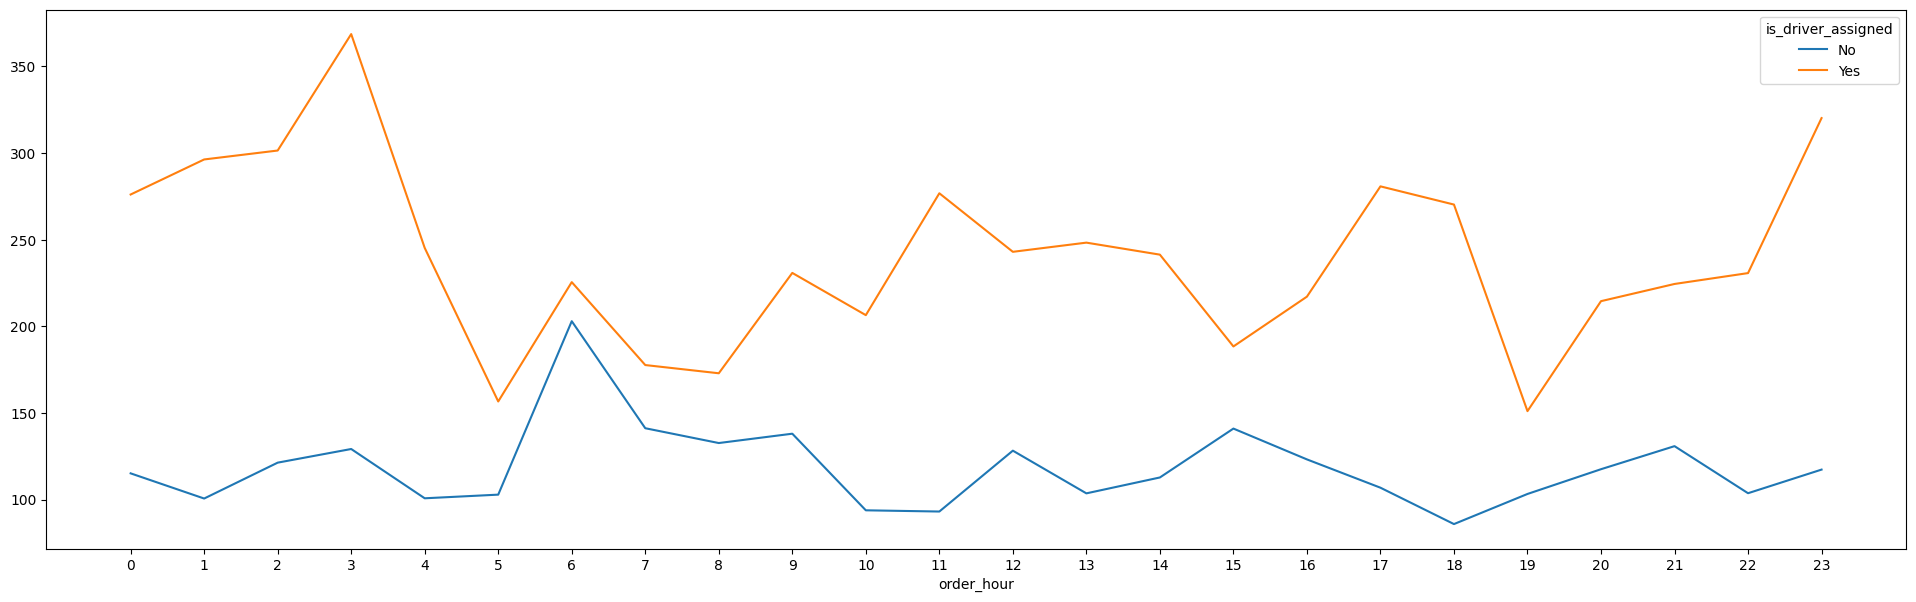

In [31]:
meanCancel = dfMain.groupby(by=["order_hour", "is_driver_assigned"])["cancellation_time"].mean()
print(meanCancel)
meanCancel.reset_index().pivot(index="order_hour",
                                   columns="is_driver_assigned",
                                   values="cancellation_time").plot(xticks=range(0, 24), figsize=(24, 7))

order_hour
0     375.433333
1     355.322148
2     389.554167
3     381.492308
4     266.119565
5     476.787234
6     489.456140
7     642.746615
8     671.086111
9     556.085020
10    424.969298
11    405.837931
12    504.691228
13    445.228070
14    406.383838
15    518.218437
16    456.958702
17    548.673118
18    421.725333
19    396.850163
20    299.627168
21    365.630769
22    365.896386
23    386.078829
Name: ETA, dtype: float64


<Axes: xlabel='order_hour'>

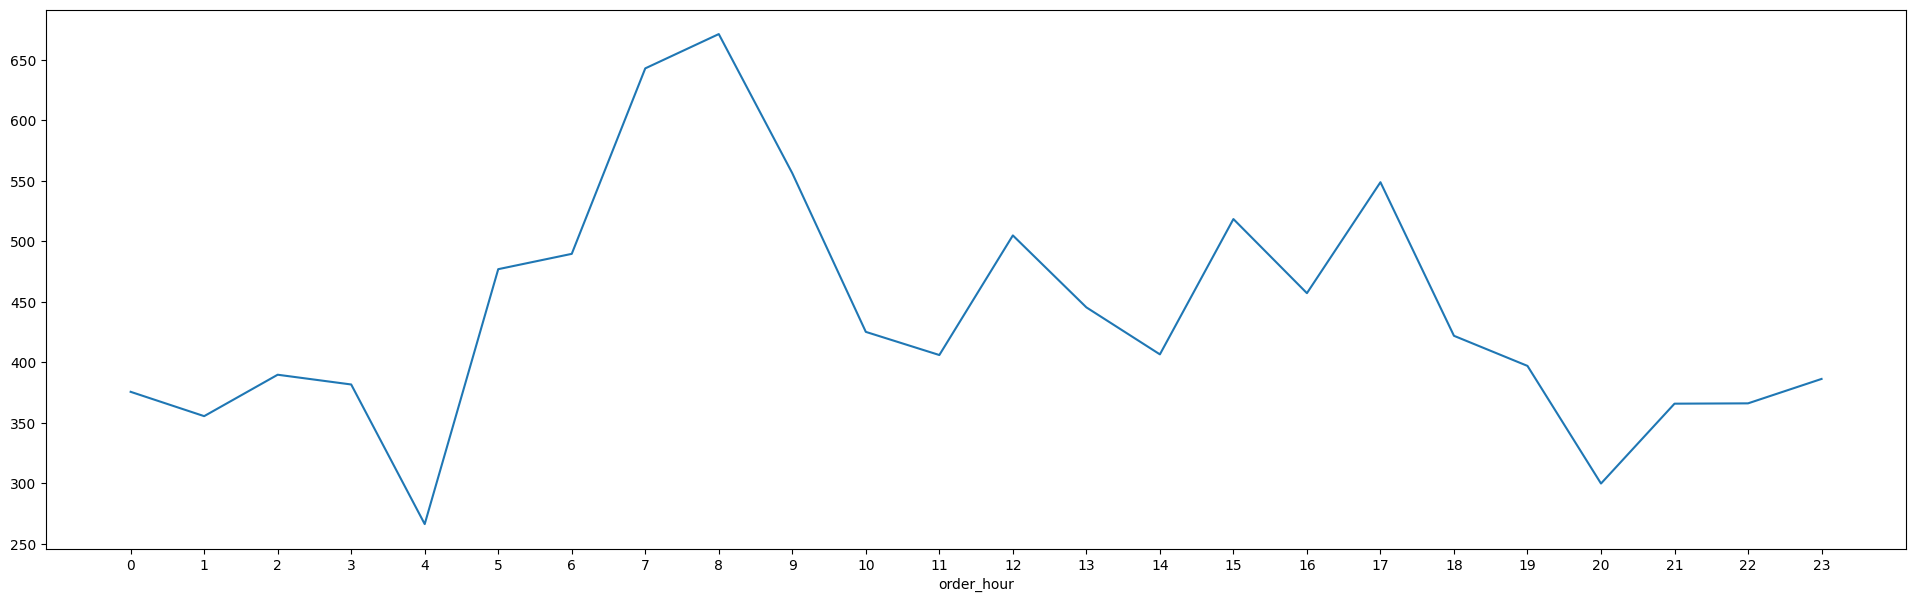

In [34]:
hourEta = dfMain.groupby(by="order_hour")["ETA"].mean()
print(hourEta)
hourEta.plot(xticks=range(0, 24), figsize=(24, 7))

In [36]:
!pip install h3
import h3
import folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.7 MB/s eta 0:00:00


In [38]:
dfMain["hex_id"] = dfMain.apply(
    func=lambda row: h3.latlng_to_cell(lat=row["latitude"], lng=row["longitude"], res=8), axis=1)
dfMain.head()

,order_time,longitude,latitude,ETA,order_id,cancellation_time,offer_id,is_driver_assigned,order_status,order_hour,hex_id
0,2025-08-21 18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client Cancelled,18,88195d2b03fffff
1,2025-08-21 20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client Cancelled,20,88195d2b19fffff
2,2025-08-21 20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client Cancelled,20,88195d2b19fffff
3,2025-08-21 20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client Cancelled,20,88195d2b19fffff
4,2025-08-21 12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client Cancelled,12,88195d2b1dfffff


In [40]:
hexGroup = dfMain.groupby(by="hex_id")["order_id"].count()
print(hexGroup)

hex_id
88195d2801fffff    65
88195d2803fffff    14
88195d2805fffff    10
88195d2807fffff     3
88195d2809fffff    46
                   ..
88195d749dfffff     2
88195d74d1fffff     1
88195d74d3fffff     4
88195d74d5fffff     1
88195d74d7fffff     5
Name: order_id, Length: 139, dtype: int64


In [42]:
hexGroup = hexGroup.reset_index() # make it a df
hexGroup.head()

,level_0,index,hex_id,order_id
0,0,0,88195d2801fffff,65
1,1,1,88195d2803fffff,14
2,2,2,88195d2805fffff,10
3,3,3,88195d2807fffff,3
4,4,4,88195d2809fffff,46


In [43]:
hexGroup = hexGroup.sort_values(by="order_id")  # sort by count
total_orders = hexGroup["order_id"].sum()  # get total number of orders
hexGroup["cum_sum"] = hexGroup["order_id"].cumsum()  # get cum sum of each records
hexGroup["cum_perc"] = 100 * hexGroup["cum_sum"] / total_orders  # get the percentage covered by each
hexGroup[hexGroup["cum_perc"] <= 80]  # display just the top 80%

,level_0,index,hex_id,order_id,cum_sum,cum_perc
11,11,11,88195d282bfffff,1,1,0.003198
38,38,38,88195d2953fffff,1,2,0.006396
122,122,122,88195d3993fffff,1,3,0.009594
79,79,79,88195d2aebfffff,1,4,0.012793
137,137,137,88195d74d5fffff,1,5,0.015991
...,...,...,...,...,...,...
61,61,61,88195d2a27fffff,1295,15628,49.980811
20,20,20,88195d284dfffff,1937,17565,56.175643
91,91,91,88195d2b19fffff,1960,19525,62.444032
87,87,87,88195d2b11fffff,2191,21716,69.451196


In [68]:
map = folium.Map(location=[dfMain["latitude"].mean(), dfMain["longitude"].mean()],
                 zoom_start=12,
                 tiles="cartodbpositron")

In [58]:
!pip install geojson

In [69]:
import json
import geojson
import h3.api.basic_int as h3  # using the integer-based API

def to_geojson(row):
    """Transform hex_id into a GeoJSON feature."""
    # Convert hex string to integer (required by basic_int API)
    int_cell = int(row["hex_id"], 16)

    # Get boundary in [lat, lng], flip to [lng, lat] for GeoJSON
    latlngs = h3.cell_to_boundary(int_cell)
    lnglats = [[lng, lat] for lat, lng in latlngs]

    geometry = {
        "type": "Polygon",
        "coordinates": [lnglats]
    }

    return geojson.Feature(
        id=row["hex_id"],
        geometry=geometry,
        properties={"order_id": row["order_id"]}
    )

# Apply function row-wise and collect GeoJSON features
geojsons = hexGroup.apply(to_geojson, axis=1).tolist()
geojson_str = json.dumps(geojson.FeatureCollection(geojsons))

In [70]:
import matplotlib

colormap = matplotlib.colormaps["plasma"]  #
max_order_gk = hexGroup["order_id"].max()
min_order_gk = hexGroup["order_id"].min()

In [71]:
folium.GeoJson(data=geojson_str, style_function=lambda f: {
    "fillColor": matplotlib.colors.to_hex(
        colormap((f["properties"]["order_id"] - min_order_gk) / (max_order_gk - min_order_gk))),
    "color": "black",
    "weight": 1,
    "fillOpacity": 0.7
}).add_to(map)

In [72]:
map